# Empalme con la clase anterior.




Otra forma de resolver el problema de la ecuacion de onda semi-infinita es usando el
# Metodo de  extension par e impar.
Para la extension para se usan Dirichlet 0, para la impar se usa Neumann. (hablaremos de la Neumann pronto).
La condicion 0 de Nuemann es $\partial(\ell, t)/\partial x = 0$ done $\ell$ es el extremo. En nuestro caso $\ell=0$.  Esto lo vemos en mas detalle mas tarde.

La idea de la reflexion (la extension impar) con condiciones de Dirichlet 0 es que lo que pasa en $[0, \infty)$ es igual (reflejado) a lo que pasa en $(-\infty, 0)$, con signo opuesto. Veamos un ejemplo y lo implementamos

Asumamos que la velocidad de particula es $0$. Es decir $u(x,0)= \psi(x)=0$
Etonces la contribucion inicial es solo por parte de $\varphi(x)$.

Vamos a definir una extension de la condicion inicial (reflexion, impar)

$$\hat{u}(x,0) = \hat{\varphi}(x) =
\begin{cases}
\varphi(x )   \quad \text{si } x \ge 0 \\
-\varphi(-x )   \quad \text{si } x < 0 \\
\end{cases}
 $$

 La solucion de d'Alembert seria

 $$\hat{u}(x,t) = \frac{\hat{\varphi}(x+ct) + \hat{\varphi(x -ct)}}{2} $$

**Ejemplo 3.4.1**:
Use $c=1$. Asuma la condicion inicial por ramas

$$
\varphi(x) =
\begin{cases}
0 \quad , \quad \text{para   } \quad  x < 3 \\
x-3 \quad , \quad \text{para   } \quad  3 \le x \le  4 \\
5-x \quad , \quad \text{para   } \quad  4 \le x \le  5 \\
0 \quad , \quad \text{para } \quad x \ge 5.
\end{cases}
 $$

 Veamos la implementacion en `Python`

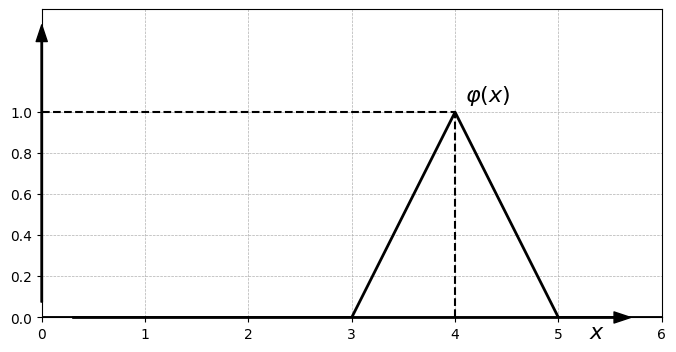

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# definamos la condicion inicial  phi en vez de varphi
def phi(x):
    return np.piecewise(x, [x<3, (x >=3) & (x <=4), (x>4) & (x<=5) , (x > 5)],
     [lambda x: 0,
      lambda x: x-3,
      lambda x: 5-x,
      lambda x: 0])

# dominio
x = np.linspace(0, 6, 1000)
y = phi(x)

# dibujamos la condicion inicial
plt.figure(figsize = (8,4))
plt.plot(x, y, 'k', linewidth=2)


# adornos
plt.plot([0,4],[1,1], 'k--', linewidth=1.5)
plt.plot([4,4],[0,1], 'k--', linewidth=1.5)

# labels and ticks
plt.text(4.1, 1.05, r'$\varphi(x)$', fontsize=16)
plt.text(5.3, -0.1 , r'$x$', fontsize=16)

# ticks
xticks = np.arange(0, 6.1, 1)
yticks = np.arange(0, 1.1, 0.2)

# set limits and grid
plt.xlim(0, 6)
plt.ylim(0, 1.5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# arrows on axes
plt.annotate('', xy=(6,0), xytext=(0,0),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8))
plt.annotate('', xy=(0,1.5), xytext=(0,0),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8))

plt.show()





## defina la antisimetrica de phi. phi-hat


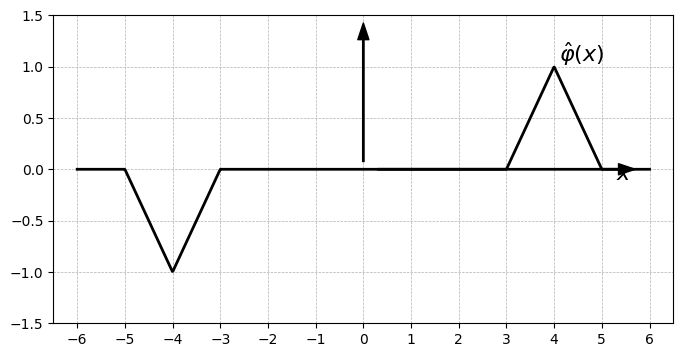

In [2]:
def phihat(x):
    return np.piecewise(x, [x <=0, x>0],
                        [lambda x: -phi(-x),
                         lambda x: phi(x)])

# dominio y rango
x = np.linspace(-6, 6, 1000)
y = phihat(x)

# dibujamos la antisimetrica
plt.figure(figsize = (8,4))
plt.plot(x, y, 'k', linewidth=2)

# labels
plt.text(4.1, 1.05, r'$\hat{\varphi}(x)$', fontsize=16)
plt.text(5.3, -0.1 , r'$x$', fontsize=16)

# define xticks and yticks
xticks = np.arange(-6, 6.1, 1)
yticks = np.arange(-1.5, 1.6, 0.5)

# set limits and grid
plt.xlim(-6.5, 6.5)
plt.ylim(-1.5, 1.5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# add arrow on axes
plt.annotate('', xy=(6,0), xytext=(0,0),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8))
plt.annotate('', xy=(0,1.5), xytext=(0,0),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8))

plt.show()

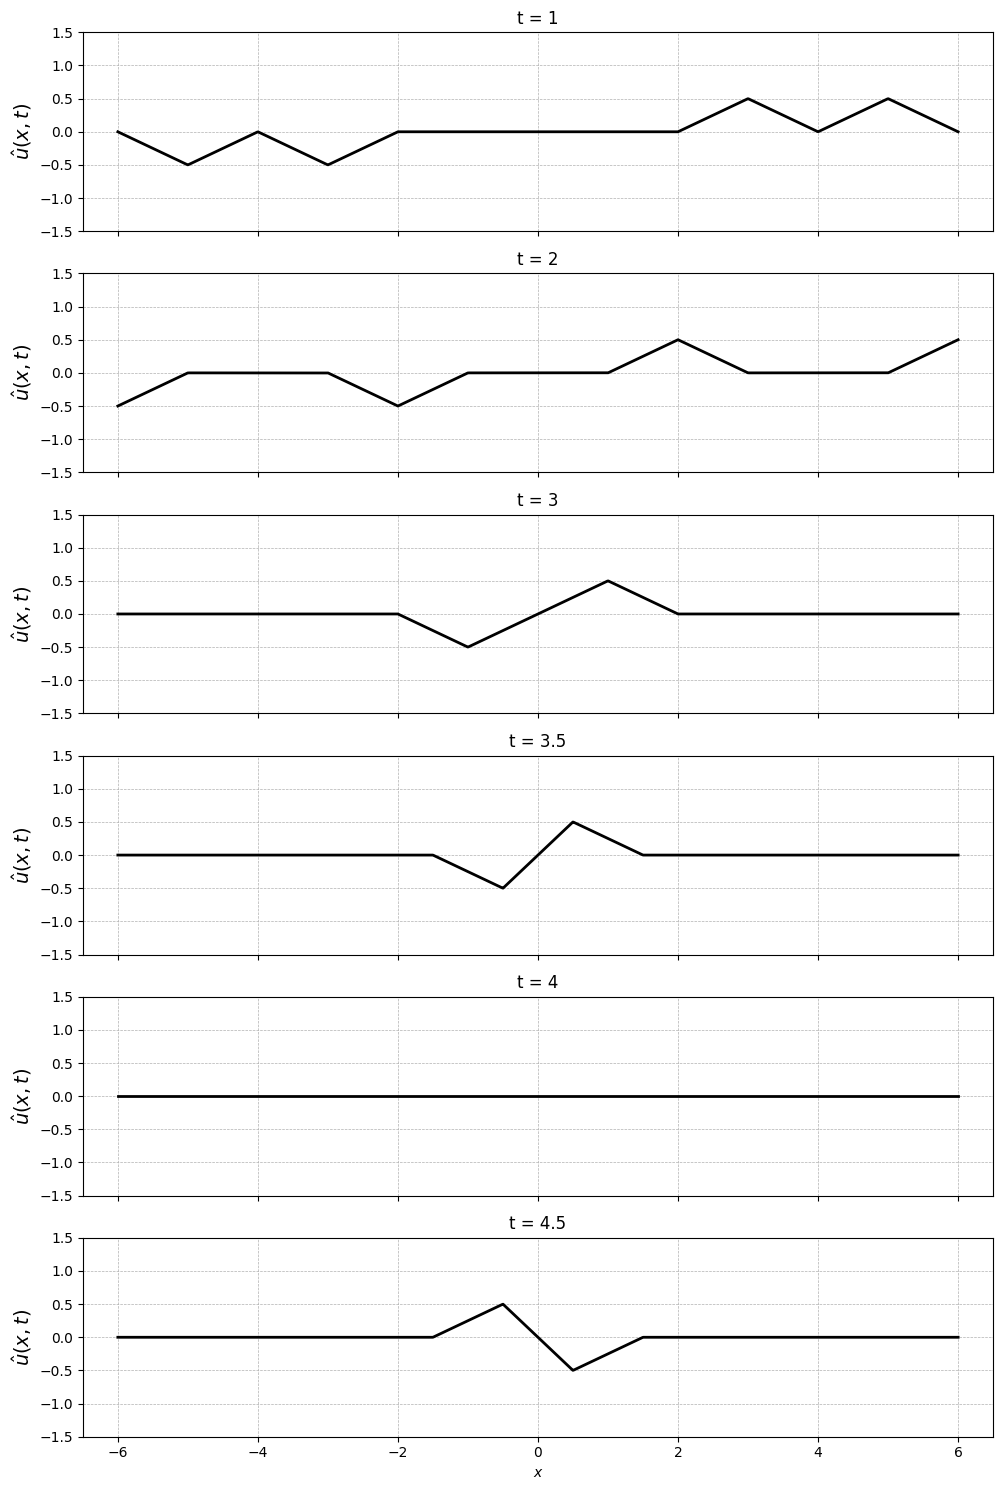

In [3]:
# definimos uhat
c=1
def uhat(x, t):
    return (phihat(x + c*t) + phihat(x - c*t))/2

# define x values
x = np.linspace(-6, 6, 1000)
y = uhat(x, 0)

# t values
t_values = [1, 2, 3, 3.5, 4, 4.5]

# create plots for each t in different frames
fig, axes = plt.subplots(len(t_values), 1, figsize=(10, 15), sharex=True)

for i, t in enumerate(t_values):
    y = uhat(x, t)
    axes[i].plot(x, y, 'k', linewidth=2.0)
    axes[i].set_title(f't = {t}')
    axes[i].set_ylim(-1.5, 1.5)
    axes[i].set_xlim(-6.5, 6.5)
    axes[i].grid(True, which='both', linestyle='--', linewidth=0.5)
    if i == len(t_values) - 1:
        axes[i].set_xlabel(r'$x$')
    axes[i].set_ylabel(r'$\hat{u}(x, t)$', fontsize=14)
plt.tight_layout()
plt.show()


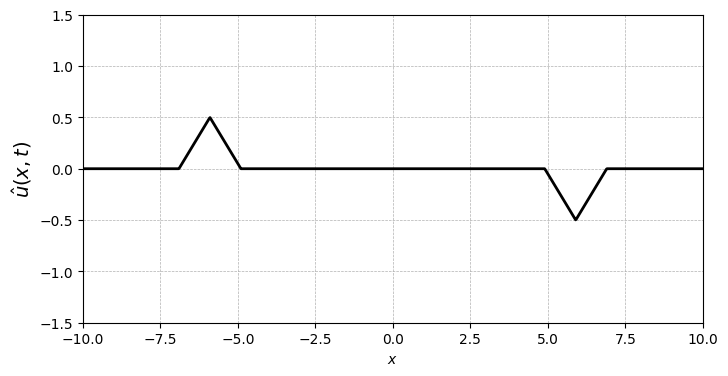

In [10]:
# animacion
import matplotlib.animation as animation

# define x values
x = np.linspace(-10, 10, 1000)
y = uhat(x, 0)

# create plot
fig, ax = plt.subplots(figsize=(8,4))
ax.set_xlim(-10, 10)
ax.set_ylim(-1.5, 1.5)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$\hat{u}(x, t)$', fontsize=14)

line, = ax.plot(x, y, 'k', linewidth=2.0)

# initialize plot
def init():
    line.set_data([], [])
    return line,

# animation function
def animate(i):
    t = i * 0.1
    y = uhat(x, t)
    line.set_data(x, y)
    return line,


# create animation
ani = animation.FuncAnimation(fig, animate, init_func=init, frames=100, interval=100, blit=True)

ani.save('uhat.gif', writer='imagemagick')

## Otras condiciones de frontera.
### condicion de frontera de Neumann

La condicion es

$$\frac{\partial u}{\partial t}(0,t) = 0  \quad ,  t > 0 $$
para $x=0$.

Para $x>ct$ la ecuacion de d'Alalembert es valida

$$u(x,t) = f(x-ct) + g(x+ ct) $$

Aplicamos la condicion inicial $x=0$

$$f'(-ct) + g'(ct) = 0 $$
sustituyamos $z=-ct$

$$f'(z) + g'(-z) = 0 $$
Integramos esta function

$$f(z) - g(-z) = c_1 = \text{const}  \quad , \quad z<0 $$

$$f(z) =  g(-z)  + c_1  \tag{0}$$

Para $x<ct$ probamos en clase anterior que

$$g(x) = \frac{\varphi(x)}{2} + \frac{1}{2c}  \int_0^x \psi(s) ds \tag{1} $$
y usando (0)

$$f(x-ct) = g(ct-x) + c_1 = \frac{\varphi(ct -x)}{2} + \frac{1}{2c} \int_0^{ct -x} \varphi(s) ds + c_1  \tag{3} $$

Para encontrar la constante usamos las condiciones de continuidad.  Es
decir que $u(x,t)$ es continua a traves de la caracteristica. $x=ct$. Recordemos  la condicion inicial de Neumann

$$\frac{\partial u(0,t)}{\partial x}(0,t)= 0  \quad , \quad t>0 $$
Antes vimos una condicion de continuidad

$$f(0^-) = \frac{\varphi(0)}{2}  \tag{4}$$
ahora, de la ecuacion (3) tomando $\lim_{x \to ct^-}$
asumiendo que $\varphi(x)$ es continua.

$$f^(0^-)=  \frac{\varphi(0)}{2} + c_1 \tag{5} $$
igualando (4) con (5)

$$\frac{\varphi(0)}{2} + c_1 = \frac{\varphi(0)}{2} $$
De aca que

$$c_1 = 0. $$
En las cuerdas hay continuidad, de otra forma la cuerda se rompe. En los gases hay ondas de choque (shock waves) en dinamica de fluidos. Este analisis esta por fuera de este curso.




S**Ejemplo 3.4.4.0.1**: Encuentre la solucion continua del problema

$$
\begin{cases}
u_{tt} = 9 u_{xx} \\
u(x,0) = \mathrm{e}^{-x} \quad , \quad u_t(x,0) = \cos 5 x  \quad , \quad \text{condiciones iniciales} \\
u_x(0,t) = u(0, t) + t
\end{cases}
$$

**Solucion**:
Identificamos
$$\varphi(x) = \mathrm{e}^{-x} \quad  , \quad \psi(x) = \cos 5 x $$
En este caso $c=3$.

Consideramos dos casos:

1. $x \ge 3t$ **Por debajo de la caracteristica principal** $x=3t$.
Este tinee la solucion clasica de d'Alembert

$$ u(x,t) = \frac{\mathrm{e}^{-(x-3t)} + \mathrm{e}^{-(x+3t)}}{2} + \frac{1}{6} \int_{x-3t}^{x+3t} \cos 5 s ds $$

Es decir
$$ u(x,t) = \frac{\mathrm{e}^{-(x-3t)} + \mathrm{e}^{-(x+3t)}}{2} + \frac{1}{6} \frac{\sin[ 5 ( x+ 3t) - \sin 5(x-3t)}{5}  \tag{20} $$

2. $x < 3t$ **Por encima de la caracteristica principal**.
En general la solucion es:

$$u(x,t) = f(x-3t) + g(x+ 3t) $$
Debemos encontrar $f,g$.

Encontramos primero $g$
De las condiciones iniciales

$$u(x,0) = \mathrm{e}^{-x} = f(x) + g(x) \quad , \quad  x > 0 \tag{6} $$
$$u_t(x,0) = \cos 5 x = -3 f'(x) + 3 g'(x) \quad , \quad x > 0  $$

Integremos la segunda ecuacion

$$f(x) - g(x) = -\frac{\sin 5x}{15} \tag{7} $$

De (6) - (7) elimino  $f$

$$ g(x) = \frac{\mathrm{e}^{-x}}{2} + \frac{\sin 5x}{30}$$
No habria constante que falta?

Para obtener $f$ seguimos otro camino.

\begin{eqnarray}
u(x,t) &=& f(x-3t) + g(x + 3t) \\
&=& f(x-3t) + \frac{\mathrm{e}^{-(x+3t)}}{2} + \frac{\sin 5(x+3t)}{30}
\end{eqnarray}

Aplicamos la ecuacion de frontera

$$u_x(0,t) = u(0,t) + t \quad , \quad x=0$$

$$f'(-3t) -\frac{\mathrm{e}^{-3t}}{2} + \frac{\cos 15 t}{6} = f(-3t) + \frac{\mathrm{e}^{-3t}}{2} + \frac{\sin 15 t}{30} + t$$


Para simplificar voy a cambiar de notacion $y=-3t$

$$f'(y) -\frac{\mathrm{e}^{y}}{2} + \frac{\cos 5y}{6} = f(y) + \frac{\mathrm{e}^{y}}{2} - \frac{\sin 5y}{30} + t$$

Toca resolver esta ODE (Ordinary Differential Equation) de primer orden.
Reordenamos la ecuacion anterior

$$f'(y) - f(y) -\frac{\mathrm{e}^{y}}{2} + \frac{\cos 5y}{6} =  \frac{\mathrm{e}^{y}}{2} - \frac{\sin 5y}{30} -\frac{y}{3}$$

Multiplicamos por el factor de integracion $\mathrm{e}^{-y}$.

$$\mathrm{e}^{-y} f'(y) - \mathrm{e}^{-y} f(y) -\frac12 + \frac{\mathrm{e}^{-y} \cos 5y}{6} =  \frac12 - \frac{\mathrm{e}^{-y} \sin 5y}{30} + \frac{\mathrm{e}^{-y} y}{3}$$


Es decir
$$[ \mathrm{e}^{-y} f(y)]' -1 + \frac{\mathrm{e}^{-y} \cos 5y}{6} =   \frac{\mathrm{e}^{-y} \sin 5y}{30} + \frac{\mathrm{e}^{-y} y}{3}$$

Integramos esta ecuacion

$$ \mathrm{e}^{-y} f(y) = \int dy \left ( 1 - \frac{\mathrm{e}^{-y} \cos 5y}{6} - \frac{\mathrm{e}^{-y} \sin 5 y}{30 } - \frac{\mathrm{e}^{-y} y}{3}  \right )  + c \quad , y<0 $$

$$\mathrm{e}^{-y} f(x) = y + \frac{\mathrm{e}^{-y}}{156}( \cos 5y -  \sin 5y) +  
\frac{\mathrm{e}^{-y}}{780} ( \sin 5 y -5 \cos 5 y) + \frac{\mathrm{e}^{-y} ( y +  1)}{3}  $$

Multi[plicamos por $\mathrm{e}^{y}$
$$f(x) = \mathrm{e}^y y + \frac{1}{156}( \cos 5y -  \sin 5y) +  
\frac{1}{780} ( \sin 5 y - 5 \cos 5 y) + \frac{( y +  1)}{3} + c \mathrm{e}^y .$$

Dehemos simplificar

$$f(y) =  \mathrm{e}^y y  + \frac{1}{195} \sin 5y + \frac{y+1}{3} + c \mathrm{e}^y $$

Ahora aplicamos la condicion de continuidad

$$ f(0^{-})= f(0^+) $$
Para $f(0^-)$. De la ecuacion (20).

$$f(y) = \frac{\mathrm{e}^{-y}}{2} - \frac{\sin 5y}{30} $$
de forma que
$$f(0^+) = \frac12 $$

Para $f(0^-)$ utilizamos la ecuacion
$$f(0^-)= \frac13 + c $$

Para que halla continuidad
$$\frac12 = \frac13 + c $$
De forma que

$$c = \frac12 - \frac13 = \frac16 $$
De forma que la solucion es:


$$f(x) = \mathrm{e}^y y + \frac{1}{156}( \cos 5y -  \sin 5y) +  
\frac{1}{780} ( \sin 5 y - 5 \cos 5 y) + \frac{( y +  1)}{3} +  \frac16 \mathrm{e}^y .$$